In [1]:
from WaveAutoEncoder_model import WaveAutoEncoder
from WaveAutoEncoder_data import ToData
import config
import torch
import pytorch_lightning as pl
from DatasetLib import Dataset_onMemory
import matplotlib.pyplot as plt
from torch.utils import data as DataUtil

In [2]:
data_set = Dataset_onMemory(ToData.filepath,ToData.data_name,using_length=-1,log=True)

loaded: data, shape: (2543, 1, 640)


In [3]:
model = WaveAutoEncoder()
batch_size = 1024
EPOCHS = 1000
data_loader = DataUtil.DataLoader(data_set,batch_size,shuffle=True,num_workers=0,pin_memory=False)

In [4]:
trainer = pl.Trainer(gpus=1,num_nodes=1,precision=16,max_epochs=EPOCHS)
trainer.fit(model,data_loader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Using native 16bit precision.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type        | Params
------------------------------------------
0 | criterion | MSELoss     | 0     
1 | encoder   | WaveEncoder | 75.3 K
2 | decoder   | WaveDecoder | 48.0 K
------------------------------------------
123 K     Trainable params
0         Non-trainable params
123 K     Total params
0.493     Total estimated model params size (MB)
C:\Users\22shi\anaconda3\envs\JARVIS\lib\site-packages\pytorch_lightning\trainer\data_loading.py:102: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 999: 100%|██████████| 3/3 [00:00<00:00, 17.34it/s, loss=0.00122, v_num=18]


In [9]:
from datetime import datetime
now = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
nameE = f'params/WaveEncoder_{now}.params'
nameD = f'params/WaveDecoder_{now}.params'
name = f'params/WaveAutoEncoder_{now}.params'
torch.save(model.encoder.state_dict(),nameE)
torch.save(model.decoder.state_dict(),nameD)
torch.save(model.state_dict(),name)
print('saved')

saved


In [ ]:
#model.load_state_dict(torch.load(''))

In [7]:
viewlen = 10
with torch.no_grad():
    model.eval()
    model.cuda()
    model.half()
    data = data_set.data[0][:viewlen].cuda()
    out = model(data).cpu().detach().numpy()
    data = data.detach().cpu().numpy()

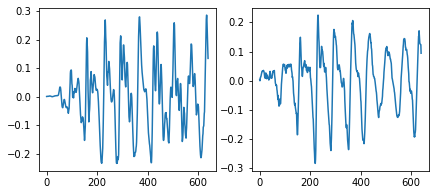

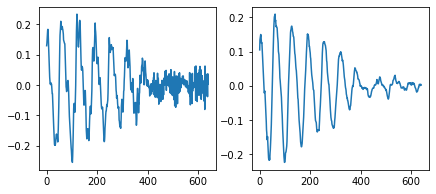

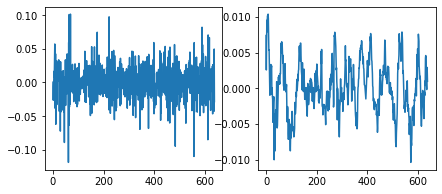

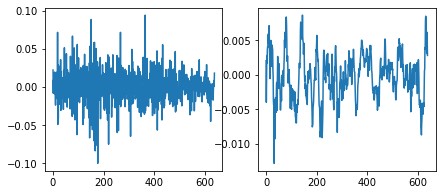

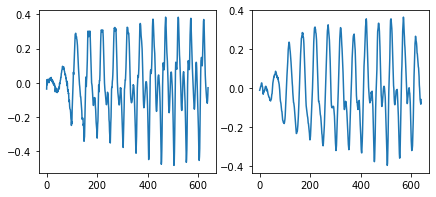

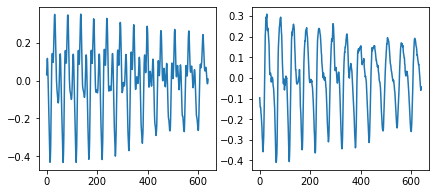

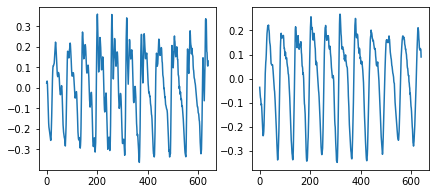

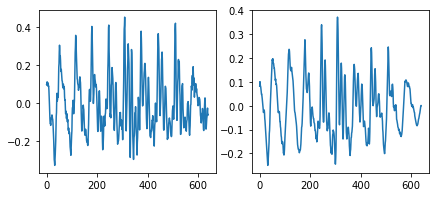

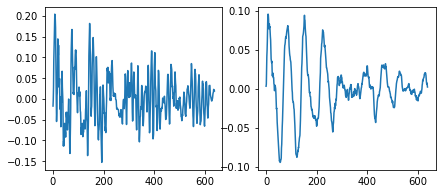

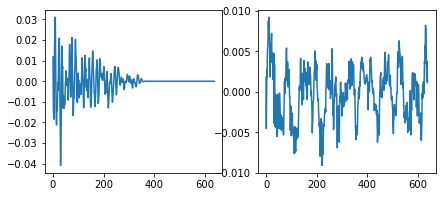

In [8]:
for i in range(len(data)):
    fig,ax = plt.subplots(1,2,figsize=(7,3))
    ax[0].plot(data[i].reshape(-1))
    ax[1].plot(out[i].reshape(-1))
    plt.show()